# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [2]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [5]:
URL = 'https://api.hh.ru/vacancies'

params_quant = {
    'text': "Quantitative Researcher",
    'area': 1,
    'page': 0,
    'per_page': 10
}

params_risk = {
    'text': "Риск-аналитик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

params_anti = {
    'text': "Антифрод аналитик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

params_ml1 = {
    'text': "ML-инженер",
    'area': 1,
    'page': 0,
    'per_page': 10
}

params_ml2 = {
    'text': "ML-разработчик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data_quant = requests.get(URL, params_quant).json()
data_anti = requests.get(URL, params_anti).json()
data_risk = requests.get(URL, params_risk).json()
data_ml1 = requests.get(URL, params_ml1).json()
data_ml2 = requests.get(URL, params_ml2).json()

In [6]:
#преобразуем в датафрейм
df_quant = pd.json_normalize(data_quant["items"])
df_anti = pd.json_normalize(data_anti["items"])
df_risk = pd.json_normalize(data_risk["items"])
df_ml1 = pd.json_normalize(data_ml1["items"])
df_ml2 = pd.json_normalize(data_ml2["items"])

In [7]:
df_ml1

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,employer.logo_urls,branding.type,branding.tariff
0,98823561,False,Data Scientist,False,False,NaN,NaN,None,None,2024-05-13T16:43:31+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98851675,False,ML-инженер (рекомендательные системы и поиск),False,False,NaN,NaN,None,None,2024-05-13T19:30:05+0300,...,37.530477,"[{'station_name': 'Аэропорт', 'line_name': 'За...",11168265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98961849,False,AI/ML Engineer,False,False,NaN,NaN,None,None,2024-05-14T19:02:05+0300,...,NaN,NaN,NaN,500000.0,NaN,RUR,False,NaN,NaN,NaN
3,98955099,False,ML engineer,False,False,NaN,NaN,None,None,2024-05-14T17:51:55+0300,...,37.679040,"[{'station_name': 'Бауманская', 'line_name': '...",15708784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98797172,False,Data Scientist,False,False,NaN,NaN,None,None,2024-05-13T13:15:06+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,98856209,False,ML-инженер,False,False,NaN,NaN,None,None,2024-05-13T21:05:53+0300,...,NaN,NaN,NaN,NaN,250000.0,RUR,True,NaN,NaN,NaN
6,98968594,False,Python-разработчик (MLOps),False,False,NaN,NaN,None,None,2024-05-14T20:31:39+0300,...,37.530477,"[{'station_name': 'Аэропорт', 'line_name': 'За...",11168265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,98918644,False,ML инженер,False,False,NaN,NaN,None,None,2024-05-14T12:28:34+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MAKEUP,NaN
8,98810207,False,Senior+ Java Developer,False,False,NaN,NaN,None,None,2024-05-13T14:58:29+0300,...,37.605274,"[{'station_name': 'Нахимовский проспект', 'lin...",5603110,400000.0,NaN,RUR,True,NaN,NaN,NaN
9,98912492,False,Data scientist (NLP),False,False,NaN,NaN,None,None,2024-05-14T11:40:56+0300,...,37.408139,"[{'station_name': 'Крылатское', 'line_name': '...",15356563,NaN,NaN,NaN,NaN,NaN,MAKEUP,NaN


(1 балл) Посчитайте сколько всего найдено вакансий:

In [8]:
cnt=0
cnt+=df_quant.shape[0]
cnt+=df_anti.shape[0]
cnt+=df_risk.shape[0]
cnt+=df_ml1.shape[0]
cnt+=df_ml2.shape[0]
cnt
# your code here

50

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [27]:
class Company:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        return f"Company Name: {self.name}, Latitude: {self.latitude}, Longitude: {self.longitude}"

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [10]:
df = pd.concat([df_quant, df_anti])
df = pd.concat([df, df_risk])
df = pd.concat([df, df_ml1])
df = pd.concat([df, df_ml2])
df.shape

(50, 77)

In [13]:
df['address'].values[0]

nan

In [37]:
df.shape[0]

50

In [40]:
# Создаем экземпляры класса Company для каждой компании, которая выставила вакансию
vacancies = []
for i in range(len(df)):
    if df['name'].values[i]:
        name = df["employer.name"].values[i]
        lat = df["address.lat"].values[i]
        lng = df["address.lng"].values[i]
        print(name, lat, lng)
        vacancies.append(Company(name, lat, lng))

Career Solutions nan nan
Amiri Human Resources nan nan
Advantage Solutions nan nan
СБЕР nan nan
Лаборатория Касперского 55.836438 37.48172
Актив Матрикс 55.736904 37.618695
Finstar Financial Group nan nan
Кьези Фармасьютикалс 55.796607 37.580032
Lenkep recruitment nan nan
the_covert nan nan
Miles&Miles nan nan
IGaming nan nan
OneTwoTrip nan nan
PARI 55.74468414924654 37.633473563506676
Ак Барс Банк 55.725397 37.623169
СБЕР nan nan
Zumdex nan nan
Альфа-Банк nan nan
банк Раунд 55.747834 37.42562
Международная iGaming компания nan nan
Метры Специализированный Застройщик 55.744901 37.583984
Симоненко Владислав Евгеньевич nan nan
ОКБ 55.731551 37.644261
Ozon 55.749451 37.542824
Miles&Miles nan nan
Центральный банк Российской Федерации 55.723592 37.527256
Инженерный Центр Информационно-аналитических систем 55.750869 37.654727
НСК ЭкоСфера nan nan
Kalinka - Realty nan nan
ОКБ 55.731551 37.644261
BetBoom nan nan
RUTUBE 55.80525 37.519863
TechAviv Agency nan nan
Choiceit nan nan
Data-Driven Lab

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [46]:
cnt_adr = 0
for i in range(len(df)):
    if not math.isnan(df['address.lng'].values[i]):
        cnt_adr+=1
cnt_adr

17

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [48]:
from geopy.distance import geodesic

def is_within_mkad(latitude, longitude):
    mkad_center = (55.749473, 37.623836)
    distance = geodesic((latitude, longitude), mkad_center).km
    mkad_radius = 9.0

    return distance <= mkad_radius

vacancies_in_mkad = []
for vacancy in vacancies:
    if not math.isnan(vacancy.latitude) and not math.isnan(vacancy.longitude):
        if is_within_mkad(vacancy.latitude, vacancy.longitude):
            vacancies_in_mkad.append(vacancy)
            print(vacancy.name)

Актив Матрикс
Кьези Фармасьютикалс
PARI
Ак Барс Банк
Метры Специализированный Застройщик
ОКБ
Ozon
Центральный банк Российской Федерации
Инженерный Центр Информационно-аналитических систем
ОКБ
Beautyliner Group


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

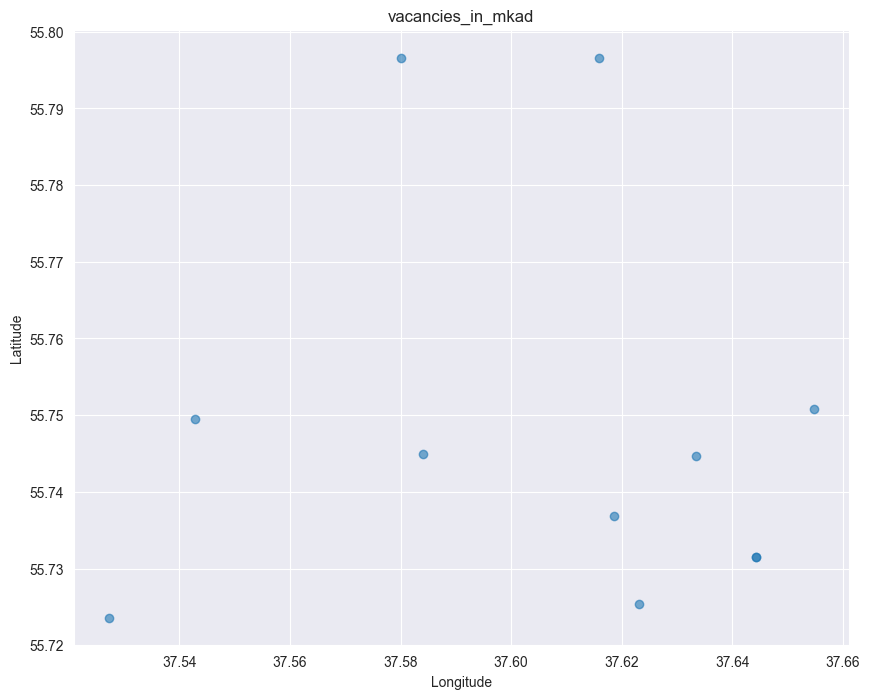

In [52]:
latitude_in_mkad = [vac.latitude for vac in vacancies_in_mkad]
longitude_in_mkad = [vac.longitude for vac in vacancies_in_mkad]

plt.figure(figsize=(10, 8))
plt.scatter(longitude_in_mkad, latitude_in_mkad, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('vacancies_in_mkad')
plt.grid(True)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [61]:
import plotly.express as px

df_in_mkad = pd.DataFrame({"Latitude": latitude_in_mkad, "Longitude": longitude_in_mkad})

fig = px.scatter_mapbox(df_in_mkad, lat="Latitude", lon="Longitude", zoom=10)
fig.update_layout(mapbox_style="open-street-map", mapbox_center={"lat": 55.749473, "lon": 37.623836})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**
> Предложения по вакансиям как ни странно смещены ближе к центру, так как там находятся юр адреса компаний. Спрос высокий, но это можно было бы увидеть на полном датафрейме
> Чтобы не получить бан за дудос запарсил только одну страницу вакансий, но в целом можно было сделать цикл по всем

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

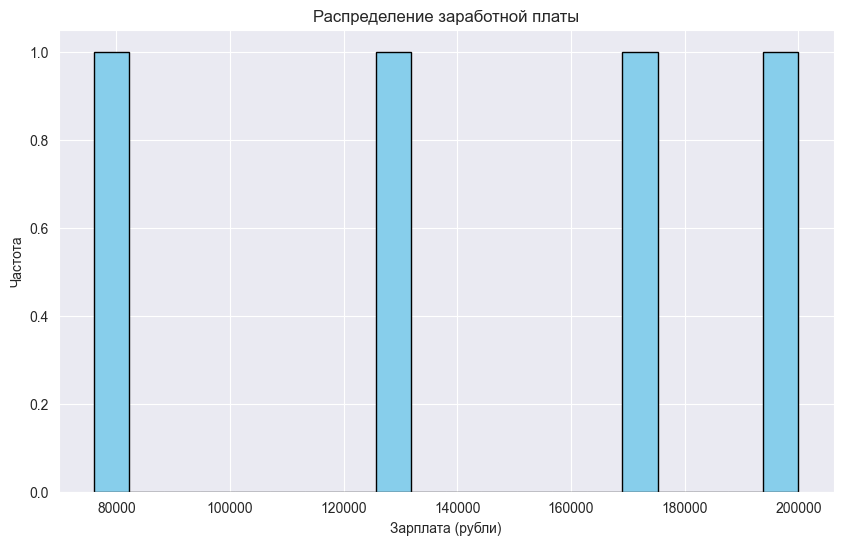

In [65]:
salaries = []

for i in range(50):
    vacancy = df["id"].iloc[i]
    vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())

    salary = vacancy_info.get('salary')
    if salary:
        if salary.get('currency') == 'RUR' and salary.get('gross') == False:
            salary_from = salary.get('from')
            salary_to = salary.get('to')
            if salary_from and salary_to:
                salary_avg = (salary_from + salary_to) / 2
                salaries.append(salary_avg)

salaries_df = pd.DataFrame(salaries, columns=['Зарплата (рубли)'])

plt.figure(figsize=(10, 6))
plt.hist(salaries_df['Зарплата (рубли)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение заработной платы')
plt.xlabel('Зарплата (рубли)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

> Средние зарплаты изображены на гистограмме выше
Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [69]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Создадим DataFrame:

In [3]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [3]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:s

In [4]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [5]:
max_price_number = diamonds.loc[diamonds['total_sales_price'].idxmax(), ['Unnamed: 0']]
max_price = diamonds['total_sales_price'].max()

min_price_number = diamonds.loc[diamonds['total_sales_price'].idxmin(), ['Unnamed: 0']]
min_price = diamonds['total_sales_price'].min()

print(max_price_number, ':', max_price)
print(min_price_number, ':', min_price)

Unnamed: 0    219703
Name: 219702, dtype: object : 1449881
Unnamed: 0    0
Name: 0, dtype: object : 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [6]:
unknown_counts = diamonds.apply(lambda x: x.isin(['unknown', 'None']).sum())
unknown_counts.sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [9]:
cols_with_drops = diamonds.columns[diamonds.isin(['None', 'unknown']).any()]
cols_with_drops

Index(['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [47]:
suitable_cols = [col for col in diamonds.columns if col.startswith('fancy_color_') or col.startswith('fluor_')]
res = len(suitable_cols)
res

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [48]:
ans = sum(~diamonds[suitable_cols].isin(['None', 'unknown']).values.flatten())
ans

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [50]:
diamonds = diamonds.drop(columns=suitable_cols)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте то же самое для колонок, начинающихся с `culet_`:

In [51]:
cols2 = [col for col in diamonds.columns if col.startswith('culet_')]
diamonds = diamonds.drop(columns=cols2)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [11]:
diamonds.total_sales_price.sum()/1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [52]:
even_index_rows = diamonds.iloc[::2]
even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [54]:
multiple_of_six_rows = diamonds.iloc[::6]
multiple_of_six_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [55]:
categorical_features = diamonds.select_dtypes(include=['object', 'category'])
categorical_features

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

> нет инфы на какой умножать

In [35]:
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

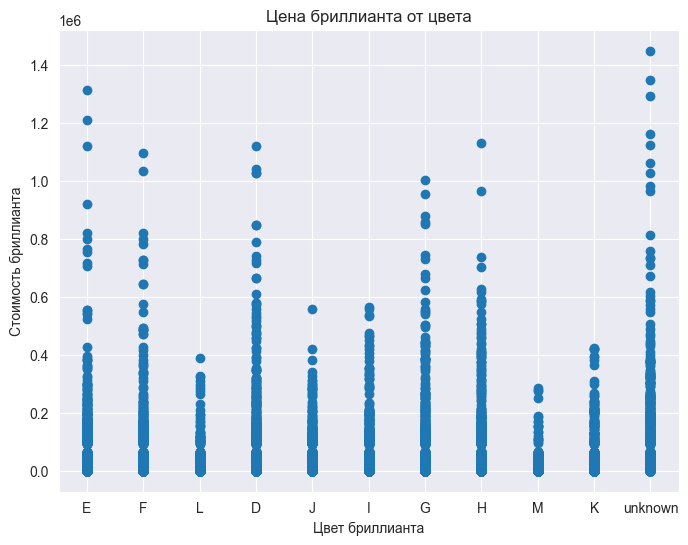

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['color'], diamonds['total_sales_price'])
plt.title('Цена бриллианта от цвета')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость бриллианта')
plt.grid(True)
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

C:\Users\Gregory\AppData\Local\Temp\ipykernel_26968\137701854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x='lab', palette='viridis')


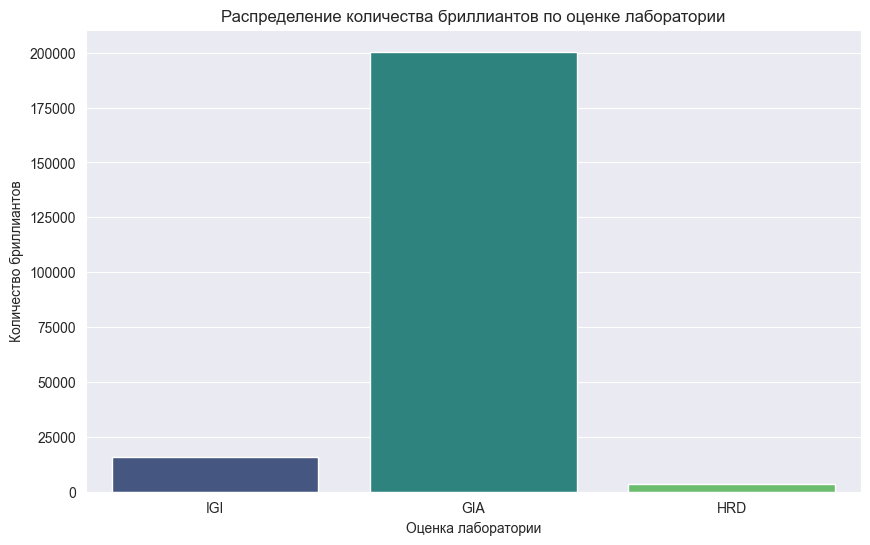

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diamonds, x='lab', palette='viridis')
plt.title('Распределение количества бриллиантов по оценке лаборатории')
plt.xlabel('Оценка лаборатории')
plt.ylabel('Количество бриллиантов')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

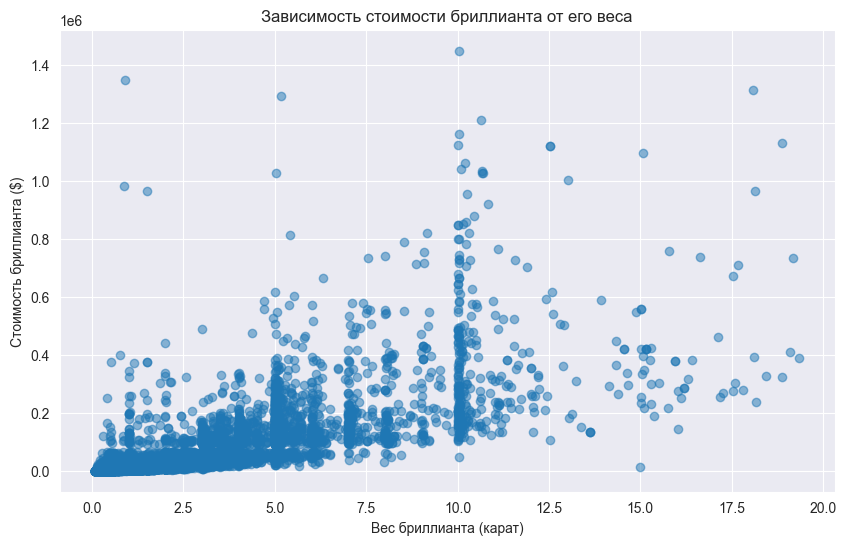

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(diamonds['carat_weight'], diamonds['total_sales_price'], alpha=0.5)
plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес бриллианта (карат)')
plt.ylabel('Стоимость бриллианта ($)')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

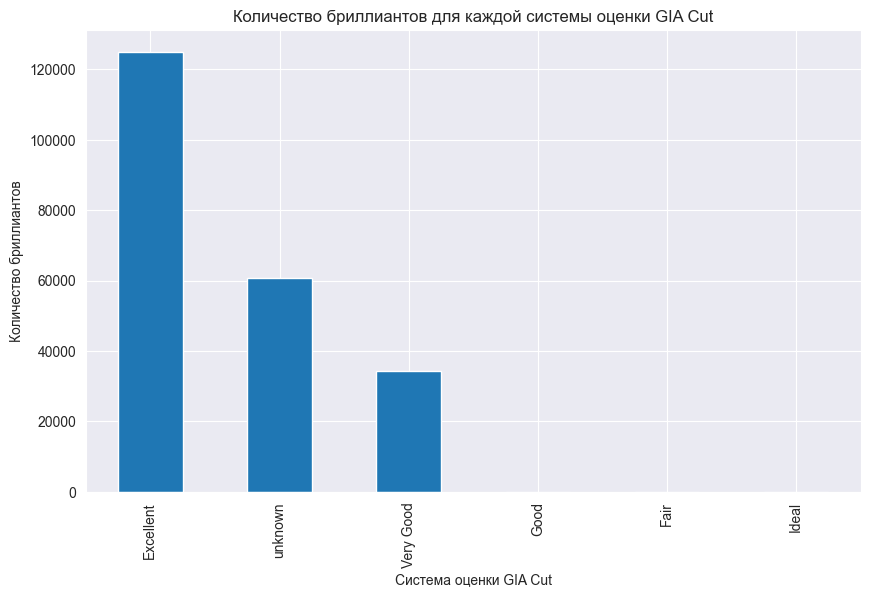

In [37]:
cut_counts = diamonds['cut_quality'].value_counts()
plt.figure(figsize=(10, 6))
cut_counts.plot(kind='bar')
plt.title('Количество бриллиантов для каждой системы оценки GIA Cut')
plt.xlabel('Система оценки GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**
бриллиантов типа excellent больше всего
цена бриллиантов выше при среднем весе и наибольшее количество бриллиантов из лаборатории gia
бриллианты с неизвестным цветом как правило несколько дороже

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [4]:
df = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
df

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
...,...,...,...,...
219698,14.06,14.18,8.66,1210692
219699,11.55,8.81,5.71,1292500
219700,17.06,17.10,10.20,1315496
219701,5.22,4.90,3.47,1350000


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [22]:
df = df.sample(frac=1)
df

,meas_length,meas_width,meas_depth,total_sales_price
207158,8.02,8.07,5.02,21734
118247,5.23,4.05,2.69,2333
26959,5.37,3.86,2.57,780
159477,8.39,5.52,3.44,4519
105188,4.87,4.88,2.91,1828
...,...,...,...,...
77612,4.34,4.36,2.66,1164
141299,7.71,4.63,3.01,3405
93810,4.60,5.16,3.03,1448
14161,4.00,4.02,2.54,682


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [5]:
df['minkowski_sum'] = np.power(np.power(df['meas_depth'], 3) + np.power(df['meas_length'], 3) + np.power(df['meas_width'], 3), 1/3)
df

C:\Users\Gregory\AppData\Local\Temp\ipykernel_26968\1711170873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minkowski_sum'] = np.power(np.power(df['meas_depth'], 3) + np.power(df['meas_length'], 3) + np.power(df['meas_width'], 3), 1/3)


,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
0,2.85,2.87,1.79,200,3.745015
1,2.84,2.89,1.78,200,3.748797
2,2.88,2.90,1.77,200,3.775608
3,2.86,2.88,1.78,200,3.754425
4,2.79,2.83,1.82,200,3.694108
...,...,...,...,...,...
219698,14.06,14.18,8.66,1210692,18.449681
219699,11.55,8.81,5.71,1292500,13.408649
219700,17.06,17.10,10.20,1315496,22.257728
219701,5.22,4.90,3.47,1350000,6.706710


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [6]:
new_df = df[['minkowski_sum', 'total_sales_price']]
new_df

,minkowski_sum,total_sales_price
0,3.745015,200
1,3.748797,200
2,3.775608,200
3,3.754425,200
4,3.694108,200
...,...,...
219698,18.449681,1210692
219699,13.408649,1292500
219700,22.257728,1315496
219701,6.706710,1350000


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [7]:
indices = np.arange(len(df))

train_size = int(0.8 * len(df))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

train_df = df.iloc[train_indices]
test_df = df.iloc[test_indices]
train_df

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
0,2.85,2.87,1.79,200,3.745015
1,2.84,2.89,1.78,200,3.748797
2,2.88,2.90,1.77,200,3.775608
3,2.86,2.88,1.78,200,3.754425
4,2.79,2.83,1.82,200,3.694108
...,...,...,...,...,...
175757,6.91,5.11,3.25,6930,7.924818
175758,7.71,5.74,3.45,6930,8.830135
175759,9.12,6.10,3.85,6930,10.140024
175760,5.88,5.91,3.57,6930,7.692621


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

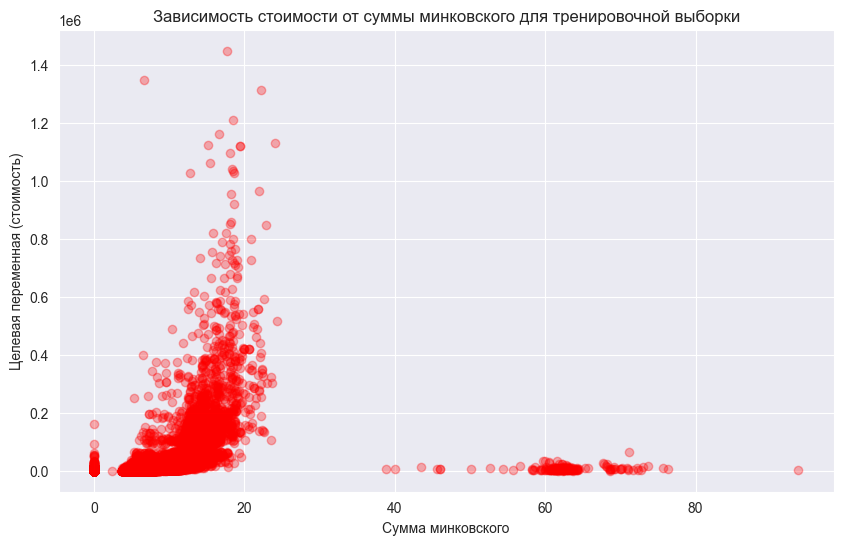

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], color='red', alpha=0.3)
plt.xlabel('Сумма минковского')
plt.ylabel('Целевая переменная (стоимость)')
plt.title('Зависимость стоимости от суммы минковского для тренировочной выборки')
plt.grid(True)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

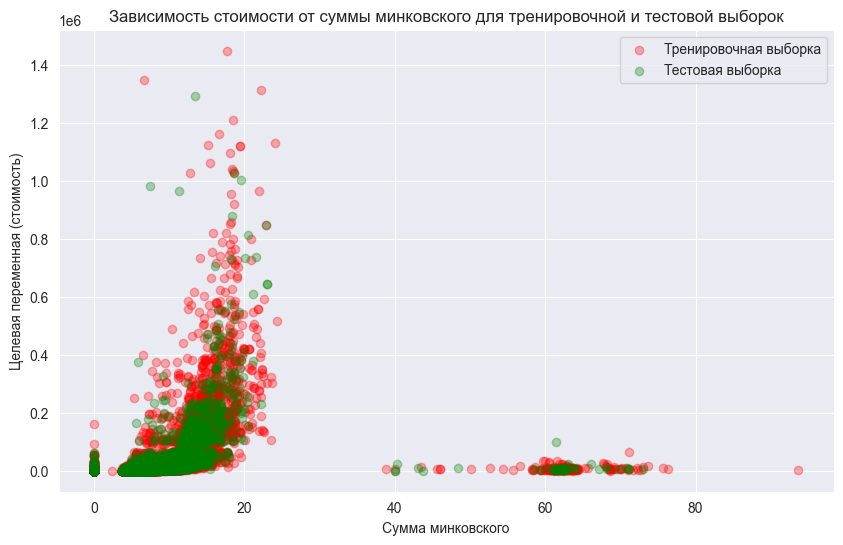

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], color='red', alpha=0.3, label='Тренировочная выборка')
plt.scatter(test_df['minkowski_sum'], test_df['total_sales_price'], color='green', alpha=0.3, label='Тестовая выборка')
plt.xlabel('Сумма минковского')
plt.ylabel('Целевая переменная (стоимость)')
plt.title('Зависимость стоимости от суммы минковского для тренировочной и тестовой выборок')
plt.legend()
plt.grid(True)
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

Реализуем kNN без циклов :)

In [ ]:
def matrix_multiplication(A, B):

    A_1 = np.expand_dims(A, axis=2)
    B_1 = np.expand_dims(B, axis=0)

    result = np.sum(A_1 * B_1, axis=1)
    return result

def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    A_squared = np.sum(A ** 2, axis=1, keepdims=True)
    B_squared = np.sum(B ** 2, axis=1, keepdims=True)
    AB = matrix_multiplication(A, B.T)

    distances = np.sqrt(A_squared - 2 * AB + B_squared.T)

    nearest_indices = np.argsort(distances, axis=0)[:k,:]

    return np.array((nearest_indices + 1).T)

knn_res = find_nearest_points(np.array(train_df.values), np.array(test_df.values), 1)

C:\Users\Gregory\AppData\Local\Temp\ipykernel_26968\1153315223.py:17: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(A_squared[i:i+block_size] - 2 * AB + B_squared.T)


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
price_diff = test_df["total_sales_price"].values - train_df.iloc[knn_res.flatten()]["total_sales_price"].values
percent_diff = (price_diff / test_df["total_sales_price"].values) * 100
mean_percent_diff = np.mean(percent_diff)
mean_percent_diff

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [21]:
categorical_features = diamonds.select_dtypes(include=['object', 'category'])
categorical_features

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,M,M,unknown,NaN,unknown,unknown,unknown,unknown
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,TN,M,unknown,NaN,unknown,unknown,unknown,unknown
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,M,STK,unknown,NaN,unknown,unknown,unknown,unknown
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,M,STK,unknown,NaN,unknown,unknown,unknown,unknown
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,TN,M,unknown,NaN,unknown,unknown,unknown,unknown
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,N,unknown,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy


In [27]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = diamonds.select_dtypes(include=['object', 'category'])
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data_1 = encoder.fit_transform(diamonds[['cut', 'color']])
encoded_df_1 = pd.DataFrame(encoded_data_1, columns=encoder.get_feature_names_out(['cut', 'color']))
encoded_data_2 = encoder.fit_transform(diamonds[['clarity', 'cut_quality']])
encoded_df_2 = pd.DataFrame(encoded_data_2, columns=encoder.get_feature_names_out(['clarity', 'cut_quality']))
diamonds_dropped = diamonds.drop(['cut', 'color', 'clarity', 'cut_quality'], axis=1)

diamonds_encoded = pd.concat([diamonds_dropped, encoded_df_1, encoded_df_2], axis=1)
diamonds_encoded

,Unnamed: 0,carat_weight,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_quality_Excellent,cut_quality_Fair,cut_quality_Good,cut_quality_Ideal,cut_quality_Very Good,cut_quality_unknown
0,0,0.09,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.09,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.09,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0.09,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.09,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,10.65,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
219699,219700,5.17,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219700,219701,18.07,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
219701,219702,0.90,GIA,Good,Good,unknown,N,unknown,70.8,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [29]:
encoded_df_1

,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,...,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,color_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
encoded_df_2

,clarity_I1,clarity_I2,clarity_I3,clarity_IF,clarity_SI1,clarity_SI2,clarity_SI3,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_quality_Excellent,cut_quality_Fair,cut_quality_Good,cut_quality_Ideal,cut_quality_Very Good,cut_quality_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
219701,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(encoded_df_1, diamonds_encoded['total_sales_price'], test_size=0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(encoded_df_2, diamonds_encoded['total_sales_price'], test_size=0.2)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [32]:
from sklearn.tree import DecisionTreeRegressor


model_1 = DecisionTreeRegressor()
model_1.fit(X_train_1, y_train_1)

model_2 = DecisionTreeRegressor()
model_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [33]:
from sklearn.metrics import mean_squared_error
y_pred_1 = model_1.predict(X_test_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
print(f"MSE1: {mse_1}")

y_pred_2 = model_2.predict(X_test_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(f"MSE2: {mse_2}")

MSE1: 712830747.0534761
MSE2: 616570727.3448032


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

Второй набор категориальных данных лучше, но очевидно ошибка очень большая и есть другие наборы данных, которых можно перебрать с помощью gridsearch, randomsearc или отобрать параметры, которые меньше кореллируют. Также возможно переобучение особенно в дереве решений.

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)